[XPOS tags](https://www.sketchengine.eu/multext-east-croatian-part-of-speech-tagset/)

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import plotly.express as px

In [2]:
!pip install datasets

In [3]:
#load hr500k dataset from Hugging Face, classla repository
from datasets import load_dataset

dataset = load_dataset("classla/hr500k")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for classla/hr500k contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/classla/hr500k
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.w

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [4]:
#check what dataset contains
dataset

DatasetDict({
    train: Dataset({
        features: ['sent_id', 'text', 'tokens', 'lemmas', 'xpos_tags', 'upos_tags', 'feats', 'iob_tags'],
        num_rows: 20159
    })
    validation: Dataset({
        features: ['sent_id', 'text', 'tokens', 'lemmas', 'xpos_tags', 'upos_tags', 'feats', 'iob_tags'],
        num_rows: 1963
    })
    test: Dataset({
        features: ['sent_id', 'text', 'tokens', 'lemmas', 'xpos_tags', 'upos_tags', 'feats', 'iob_tags'],
        num_rows: 2672
    })
})

In [5]:
# split train, validation and test subsets
# tokens column is our input data and xpos_tags column is our target data
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

X_train = train_data['tokens']
Y_train = train_data['xpos_tags']
X_valid = validation_data['tokens']
Y_valid = validation_data['xpos_tags']
X_test = test_data['tokens']
Y_test = test_data['xpos_tags']

#X_train i Y_train

In [6]:
#create a set of unique part-of-speech tags found in the training data
tags = set([word.lower() for sentence in Y_train for word in sentence])
#total number of unique tags
num_tags  = len(tags)
#total number of unique words found in the training data
num_words = len(set([word.lower() for sentence in X_train for word in sentence]))

In [7]:
print("Training data")
print("Total number of sentences in training set: {}".format(len(X_train)))
print("Dictionary size: {} words".format(num_words))
print("\nTotal number of tags: {} \nTags:".format(num_tags))
for tag in tags:
    print(tag, end=', ')

Training data
Total number of sentences in training set: 20159
Dictionary size: 59297 words

Total number of tags: 755 
Tags:
ncmsan, pp3nsd, agsmsay, agpfsly, agsmsayn, pq-msn, px-msg, pi-msg, agpfsin, agpnsay, vme1s, agsnpny, pd-fsl, ps3mpl, mlsf-g, pq3m-n, rr, agpmsayn, aspnpay, px-fpg, ps2mpl, agpfsdy, pd-fpd, aspmsiy, sa, npnsn, agcfsay, pq-mpn, npmpi, pi-fsd, var3s, pi-mpn, pq3n-i, agcmpiy, mdc, aspfsiy, ps3msi, pp1-pa, pq3m-d, mlofpi, pi-msan, agsnpgy, agpnsiy, aspfsly, agsfsay, vam2s, ps1fpg, appmpvy, px-mpa, ps1msay, agpmsdn, vma2p, var1s, pp3msl, vmp-sm, sd, ncfpg, agsnpay, ps1mpa, agcmpgy, agcmsny, px--sa, aspnsay, agcmsiy, appfsdy, ps2mpi, ps2fpa, ncfsa, mlomsn, pp3-pd, pi-fsn, px--si, ps2npg, ps3nsl, mlofsd, pp3msd, ps2fpn, mls, appnpny, ps3msd, pp2-sn, mlompg, vam2p, agpmsgn, vmr3p, aspnsdy, mlcmpg, pp3mpn, px-msi, mlcmsg, ps2msi, agpmsany, pd-mpg, agcfpdy, pi3m-l, pq-fsa, pq-msl, ps2fpg, ps1fpa, agpnpny, agsmpgy, pp3-pl, mrc, ps1mpl, mlompa, mds, ps3msay, mlcmsl, aspfply

In [8]:
# find the shortest and longest sentences in the training dataset
shortest_i = np.argmin([len(s) for s in X_train])
print("The shortest sentence in training dataset: ", X_train[shortest_i])
longest_i = np.argmax([len(s) for s in X_train])
print("The longest sentence in training dataset: ",X_train[longest_i])

The shortest sentence in training dataset:  ['Padovanac']
The longest sentence in training dataset:  ['Danas', ',', 'kada', 'postoji', 'od', '3.5', 'do', 'uber', '5.0', 'dijagonala', 'displaya', ',', 'x', 'vrsta', 'ekrana', ',', 'xy', 'rezolucija', 'ekrana', ',', 'prelazak', 'sa', 'modela', '4', 'na', '4', 's', ',', 'mi', 'je', 'definitvno', 'premalo', 'u', 'svakom', 'pogledu', ',', 'a', 'primarno', 'što', 'je', 'za', 'moj', 'ukus', 'premalen', 'dimenzijama', '(', 'onako', ',', 'glasno', 'razmišljajući', ',', 'kako', 'bi', 'opako', 'dobar', 'bio', 'Ipad', '3', 'sa', '4', 'xretina', 'zaslonom', ',', 'koja', 'bi', 'to', 'samo', 'bila', 'rezolucija', ',', 'a', 'tek', 'ekran', ',', 'ali', 'uz', 'tek', '7', 'incha', 'dijagonalu', ',', 'ili', 'sam', 'omalo', 'veću', ',', 'do', '10', 'malo', 'ipak', 'fali', ',', 'a', 'opet', ',', 'koja', 'je', 'to', 'pak', 'rezolucija', ',', 'uf', ',', 'što', 'bi', 'rekao', 'Mićo', 'Dušanović', ')', ',', 'čak', 'i', 'da', 'Siri', 'funkcionira', 'u', 'Europi',

In [9]:
# count the occurrences of each word using Counter from "collections" module
word_freq = Counter()

# iterate over each sentence in X_train, then iterate over each word in the sentence
# check if the word is not in the specified punctuation marks, if it's not, update the word frequency using word_freq.update function
for sentence in X_train:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_freq.update({word})

#print the ten most common words and their frequencies
word_freq.most_common(10)

[('i', 12705),
 ('je', 11402),
 ('u', 10071),
 ('se', 6407),
 ('na', 5541),
 ('da', 5026),
 ('za', 3871),
 ('su', 3590),
 ('od', 2515),
 ('s', 2263)]

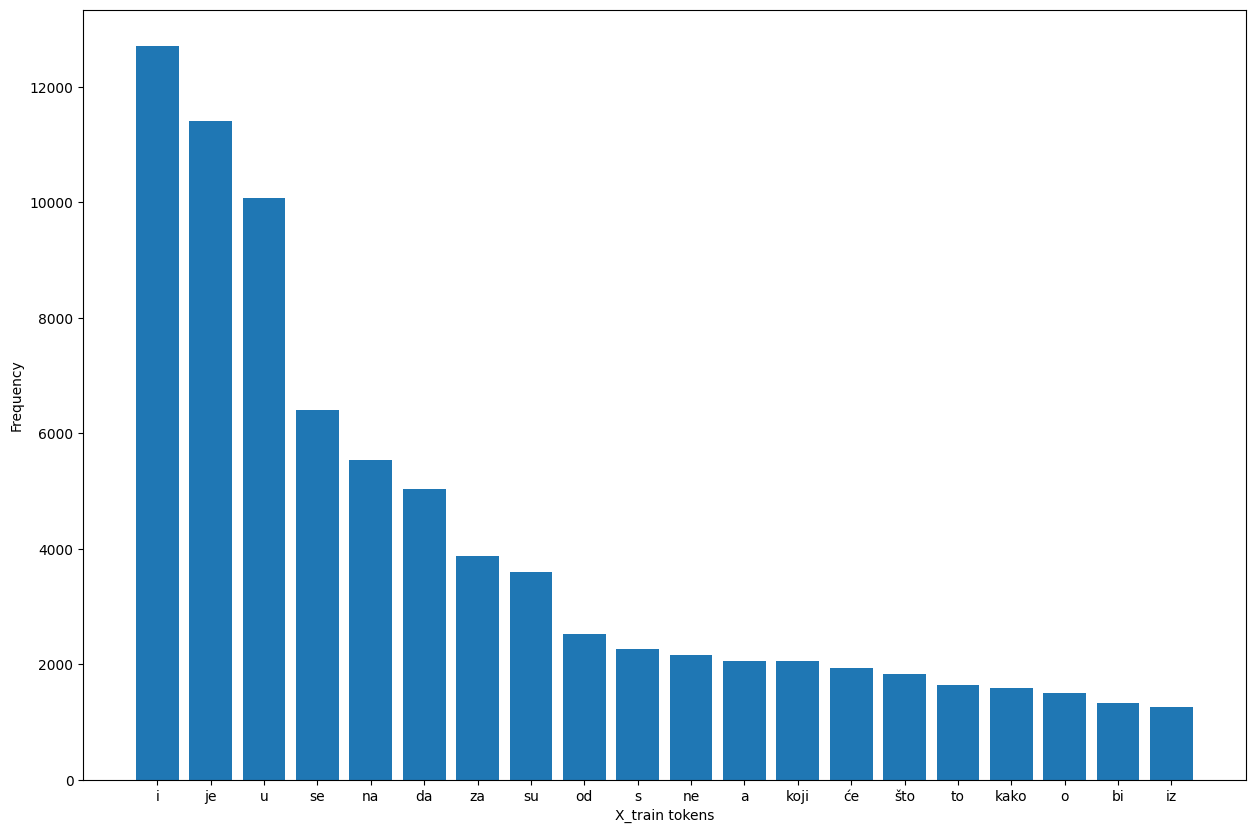

In [10]:
# create a bar plot to visualize the frequency of the top 20 most common words in the training dataset
xs=[x for x, y in word_freq.most_common(20)]
ys=[y for x, y in word_freq.most_common(20)]

plt.subplots(figsize=(15,10))
plt.bar(x=xs[:20], height=ys[:20])
plt.xlabel("X_train tokens")
plt.ylabel("Frequency")
plt.show()

In [11]:
# create a scatter plot with the word frequencies on the y-axis and the corresponding words on the x-axis
xs=[x for x, y in word_freq.most_common()]
ys=[y for x, y in word_freq.most_common()]

fig = px.scatter(x=xs, y=ys, labels={"x":"X_train tokens", "y": "Frequency"})
fig.show()

In [12]:
# how many words appeer x times in X_train
freqs = list(word_freq.values())
print("How many words appear 1 time in X_train? ", freqs.count(1))
print("How many words appear 10 times in X_train? ", freqs.count(10))
print("How many words appear 45 times in X_train? ", freqs.count(45))
print("How many words appear 450 times in X_train? ", freqs.count(450))

How many words appear 1 time in X_train?  37362
How many words appear 10 times in X_train?  451
How many words appear 45 times in X_train?  13
How many words appear 450 times in X_train?  1


In [13]:
# visualize the distribution of word frequencies
# the x-axis represents word frequencies and the y-axis represents the number of words with a given frequency
count_freq = Counter(freqs)

freq = [f for f, ff in count_freq.most_common()]
freq_freq = [ff for f, ff in count_freq.most_common()]

fig = px.scatter(x=freq, y=freq_freq, labels={"x": "Frequency", "y": "Number of words with a given frequency"})
fig.show()

In [14]:
# create a DataFrame containing information about the top 30 most common words in your dataset
data = []
for i, w in enumerate(word_freq.most_common(30)):
  if i==0:
    t = w[1]
  data.append([w[0], w[1], f"1/{i+1}", eval(f"1/{i+1}")*t, abs(w[1]-eval(f"1/{i+1}")*t)])

df = pd.DataFrame(data=data, columns=["word", "word_freq", "Zipf_fraction", "Zipf_freq", "Difference"])
#  DataFrame with the columns "word", "word_freq" (frequency of the word in the dataset),
# "Zipf_fraction" (the fraction according to Zipf's law),
# "Zipf_freq" (expected frequency based on Zipf's law),
# and "Difference" (absolute difference between observed frequency and expected frequency based on Zipf's law).
df

,word,word_freq,Zipf_fraction,Zipf_freq,Difference
0,i,12705,1/1,12705.000000,0.000000
1,je,11402,1/2,6352.500000,5049.500000
2,u,10071,1/3,4235.000000,5836.000000
3,se,6407,1/4,3176.250000,3230.750000
4,na,5541,1/5,2541.000000,3000.000000
5,da,5026,1/6,2117.500000,2908.500000
6,za,3871,1/7,1815.000000,2056.000000
7,su,3590,1/8,1588.125000,2001.875000
8,od,2515,1/9,1411.666667,1103.333333
9,s,2263,1/10,1270.500000,992.500000


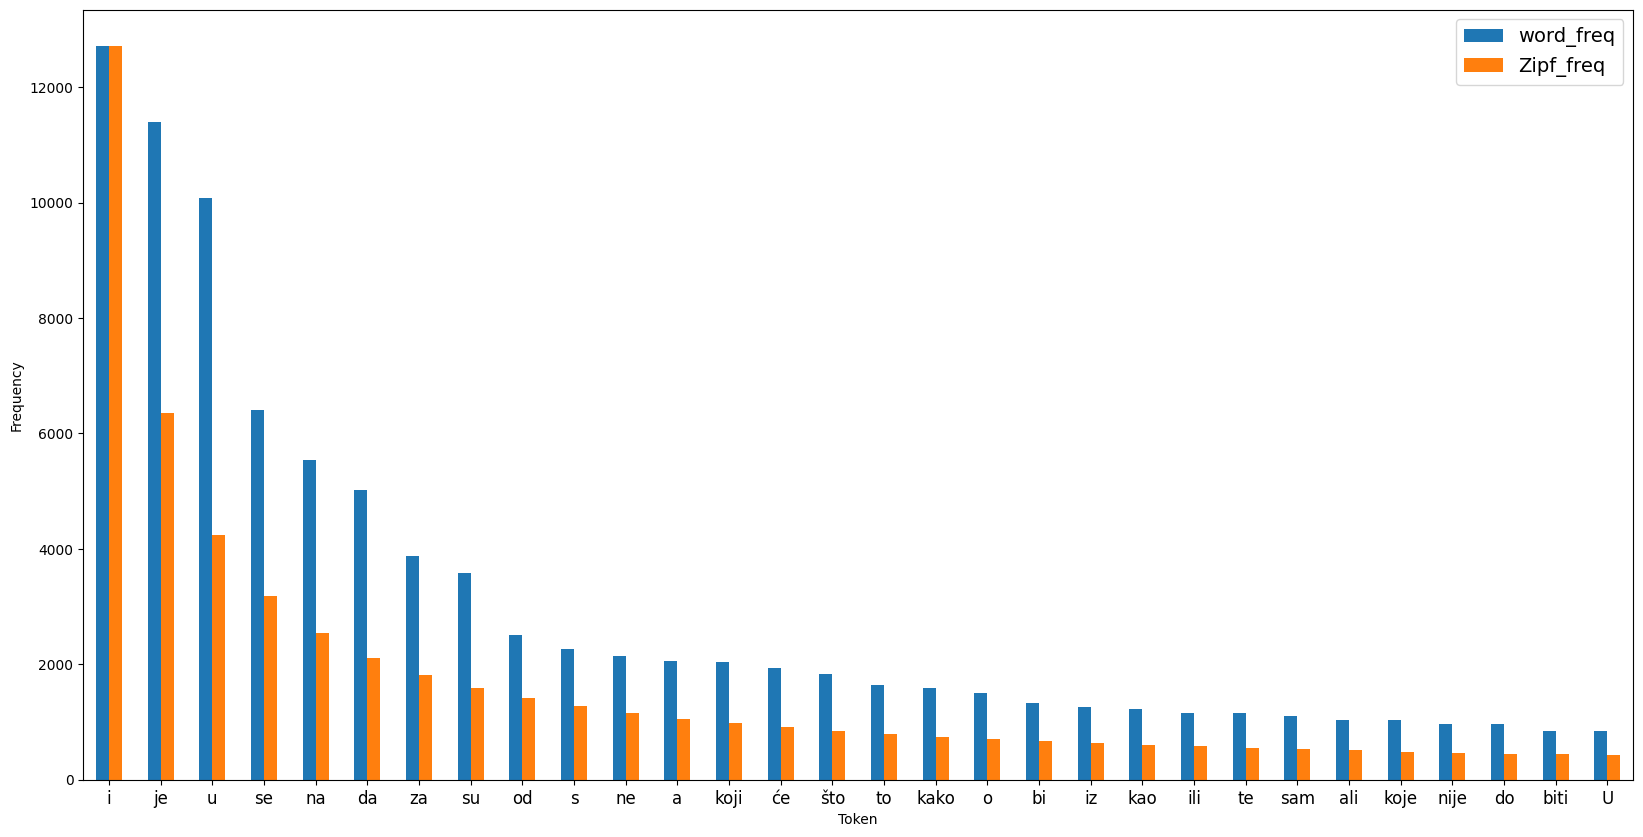

In [15]:
# create a bar plot comparing the observed word frequency with the Zipf frequency for the top 30 most common words
fig, ax = plt.subplots(figsize=(20,10))
df.filter(['word',	'word_freq', 'Zipf_freq']).plot(kind='bar', ax=ax)
ax.set_xticklabels(df['word'], size=12, rotation=0)
ax.set_xlabel("Token")
ax.set_ylabel("Frequency")
ax.legend(fontsize=14);

#X_valid i Y_valid

In [16]:
#create a set of unique part-of-speech tags found in the validation data
tags = set([word.lower() for sentence in Y_valid for word in sentence])
#total number of unique tags
num_tags  = len(tags)
#total number of unique words found in the validation data
num_words = len(set([word.lower() for sentence in X_valid for word in sentence]))

In [17]:
print("Validation data")
print("Total number of sentences in validation set: {}".format(len(X_valid)))
print("Dictionary size: {} words".format(num_words))
print("\nTotal number of tags: {} \nTags:".format(num_tags))
for tag in tags:
    print(tag, end=', ')

Validation data
Total number of sentences in validation set: 1963
Dictionary size: 11584 words

Total number of tags: 565 
Tags:
ncmsan, agpfsly, agsmsayn, pq-msn, px-msg, pi-msg, vme1s, agpnsay, agsnpny, pd-fsl, ps3mpl, mlsf-g, pq3m-n, rr, agpmsayn, aspnpay, px-fpg, agpfsdy, sa, npnsn, agcfsay, npmpi, pi-fsd, var3s, pi-mpn, mdc, aspfsiy, ps3msi, pp1-pa, pq3m-d, mlofpi, pi-msan, agsnpgy, agpnsiy, aspfsly, agsfsay, ps1fpg, px-mpa, var1s, pp3msl, vmp-sm, sd, ncfpg, ps1mpa, agsnpay, aspnsay, agcmsny, px--sa, agcmpgy, agcmsiy, ncfsa, pp3-pd, mlomsn, px--si, pi-fsn, ps2npg, ps3nsl, mlofsd, pp3msd, mls, appnpny, ps3msd, pp2-sn, mlompg, agpmsgn, vmr3p, pp3mpn, px-msi, mlcmsg, agpmsany, pd-mpg, ps2fpg, ps1fpa, agpnpny, agsmpgy, pp3-pl, mrc, mlompa, ps1mpl, mds, aspfply, mlcmsl, vmr1p, appnpdy, agsmpdy, pi-nsg, ps1npg, ncmpi, pi-msi, px-fpa, npmsay, ncnpg, ps3npl, pi-fpg, vap-sm, agpnpdy, pi-npl, ps1msl, px-nsa, vma1s, y, pp3msn, pp1-pn, ps3mpn, npnsa, ncfpn, pp3fsn, mdo, pd-npn, mlsm-g, pp1-sd

In [18]:
# find the shortest and longest sentences in the validation dataset
shortest_i = np.argmin([len(s) for s in X_valid])
print("The shortest sentence in validation dataset: ", X_valid[shortest_i])
longest_i = np.argmax([len(s) for s in X_valid])
print("The longest sentence in validation dataset: ",X_valid[longest_i])

The shortest sentence in validation dataset:  ['za_webstranicu@net.hr']
The longest sentence in validation dataset:  ['Nažalost', ',', 'stan', 'je', 'kupljen', 'dok', 'su', 'bili', 'u', 'braku', 'i', 'zajednički', 'su', 'ga', 'otplaćivali', '.', 'Problem', 'je', 'što', 'bolesnik', 'hoće', 'pola', 'stana', ',', 'a', 'njih', 'troje', 'bi', 'kao', 'trebalo', 'biti', 'u', 'malom', 'stanu', ',', 'a', 'on', 'solo', 'u', 'drugom', '.', 'Cura', 'mi', 'studira', 'medicinu', 'i', 'treba', 'joj', 'mir', ',', 'tako', 'i', 'tako', 'već', 'pati', ',', 'a', 'da', 'ovaj', 'psihopat', 'dobije', 'pola', 'stana', 'nakon', 'svega', '(', 'prijetnje', ',', 'udario', 'sina', ',', 'mrzi', 'vlastitu', 'djecu', ',', 'uzorne', 'studente', ',', 'prijeti', 'ženi', 'da', 'će', 'ju', 'baciti', 'kroz', 'prozor', ',', 'priviđaju', 'mu', 'se', 'navodni', 'ljubavnici', 'svaki', 'dan', '-', 'a', 'žena', 'ima', '65', 'godina', 'i', 'samo', 'radi', 'po', 'cijele', 'dane', 'za', 'svoju', 'djecu', 'da', 'bi', 'imali', 'nešto

In [19]:
# count the occurrences of each word using Counter from "collections" module
word_freq2 = Counter()

# iterate over each sentence in X_valid, then iterate over each word in the sentence
# check if the word is not in the specified punctuation marks, if it's not, update the word frequency using word_freq.update function
for sentence in X_valid:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_freq2.update({word})

#print the ten most common words and their frequencies
word_freq2.most_common(10)

[('i', 1146),
 ('je', 1027),
 ('u', 961),
 ('se', 621),
 ('na', 500),
 ('za', 429),
 ('da', 383),
 ('su', 278),
 ('od', 235),
 ('će', 219)]

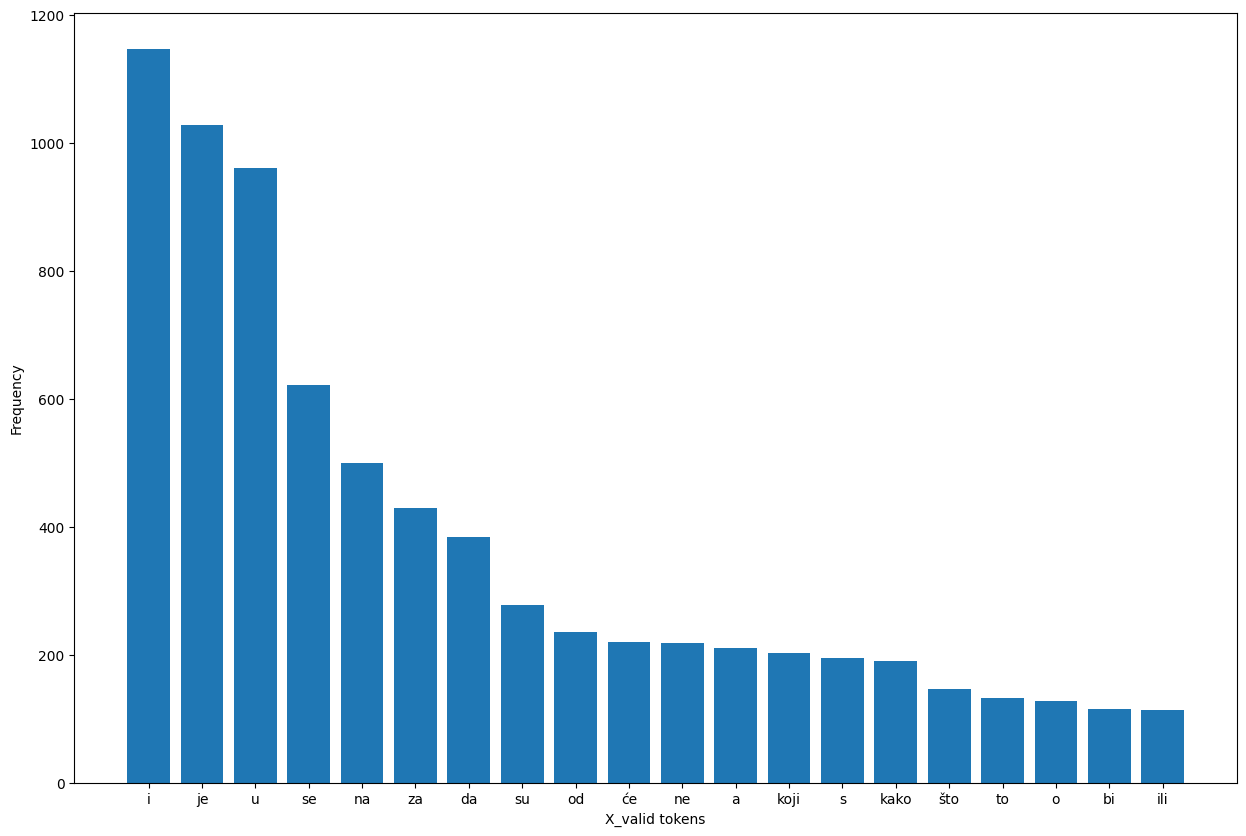

In [20]:
# create a bar plot to visualize the frequency of the top 20 most common words in the validation dataset
xs=[x for x, y in word_freq2.most_common(20)]
ys=[y for x, y in word_freq2.most_common(20)]

plt.subplots(figsize=(15,10))
plt.bar(x=xs[:20], height=ys[:20])
plt.xlabel("X_valid tokens")
plt.ylabel("Frequency")
plt.show()

In [21]:
# create a scatter plot with the word frequencies on the y-axis and the corresponding words on the x-axis
xs=[x for x, y in word_freq2.most_common()]
ys=[y for x, y in word_freq2.most_common()]

fig = px.scatter(x=xs, y=ys, labels={"x":"X_valid token", "y": "Frequency"})
fig.show()

In [22]:
# how many words appeer x times in X_valid
freqs2 = list(word_freq2.values())
print("How many words appear 1 time in X_valid? ", freqs2.count(1))
print("How many words appear 10 times in X_valid? ", freqs2.count(10))
print("How many words appear 20 times in X_valid? ", freqs2.count(20))
print("How many words appear 30 times in X_valid? ", freqs2.count(30))

How many words appear 1 time in X_valid?  8315
How many words appear 10 times in X_valid?  46
How many words appear 20 times in X_valid?  7
How many words appear 30 times in X_valid?  4


In [23]:
# visualize the distribution of word frequencies
# the x-axis represents word frequencies and the y-axis represents the number of words with a given frequency
count_freq2 = Counter(freqs2)

freq = [f for f, ff in count_freq2.most_common()]
freq_freq = [ff for f, ff in count_freq2.most_common()]

fig = px.scatter(x=freq, y=freq_freq, labels={"x": "Frequency", "y": "Number of words with a given frequency"})
fig.show()

In [24]:
# create a DataFrame containing information about the top 30 most common words in your dataset
data2 = []
for i, w in enumerate(word_freq2.most_common(30)):
  if i==0:
    t = w[1]
  data2.append([w[0], w[1], f"1/{i+1}", eval(f"1/{i+1}")*t, abs(w[1]-eval(f"1/{i+1}")*t)])

#  DataFrame with the columns "word", "word_freq" (frequency of the word in the dataset),
# "Zipf_fraction" (the fraction according to Zipf's law),
# "Zipf_freq" (expected frequency based on Zipf's law),
# and "Difference" (absolute difference between observed frequency and expected frequency based on Zipf's law).
df2 = pd.DataFrame(data=data2, columns=["word", "word_freq", "Zipf_fraction", "Zipf_freq", "Difference"])
df2

,word,word_freq,Zipf_fraction,Zipf_freq,Difference
0,i,1146,1/1,1146.000000,0.000000
1,je,1027,1/2,573.000000,454.000000
2,u,961,1/3,382.000000,579.000000
3,se,621,1/4,286.500000,334.500000
4,na,500,1/5,229.200000,270.800000
5,za,429,1/6,191.000000,238.000000
6,da,383,1/7,163.714286,219.285714
7,su,278,1/8,143.250000,134.750000
8,od,235,1/9,127.333333,107.666667
9,će,219,1/10,114.600000,104.400000


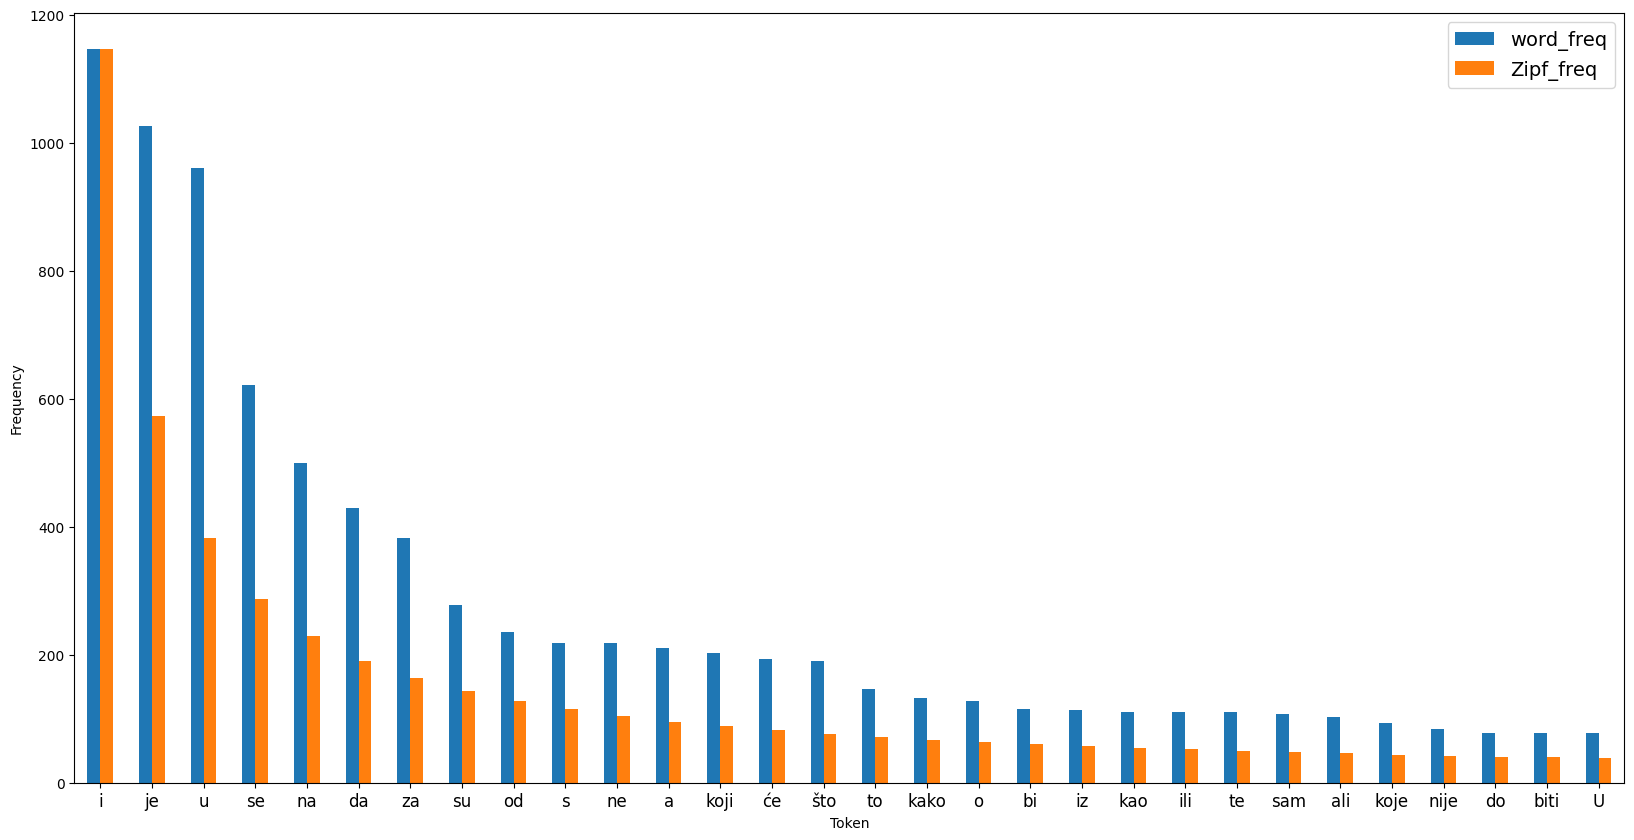

In [25]:
# create a bar plot comparing the observed word frequency with the Zipf frequency for the top 30 most common words
fig, ax = plt.subplots(figsize=(20,10))
df2.filter(['word',	'word_freq', 'Zipf_freq']).plot(kind='bar', ax=ax)
ax.set_xticklabels(df['word'], size=12, rotation=0)
ax.set_xlabel("Token")
ax.set_ylabel("Frequency")
ax.legend(fontsize=14);

#X_test i Y_test

In [26]:
#create a set of unique part-of-speech tags found in the test data
tags = set([word.lower() for sentence in Y_test for word in sentence])
#total number of unique tags
num_tags  = len(tags)
#total number of unique words found in the test data
num_words = len(set([word.lower() for sentence in X_test for word in sentence]))

In [27]:
print("Test data")
print("Total number of sentences in test set: {}".format(len(X_test)))
print("Dictionary size: {} words".format(num_words))
print("\nTotal number of tags: {} \nTags:".format(num_tags))
for tag in tags:
    print(tag, end=', ')

Test data
Total number of sentences in test set: 2672
Dictionary size: 14132 words

Total number of tags: 564 
Tags:
ncmsan, agpfsly, agsmsayn, pq-msn, px-msg, mlcfpa, pi-msg, agpnsay, agsnpny, pd-fsl, ps3mpl, pq3m-n, rr, agpmsayn, px-fpg, agpfsdy, pd-fpd, sa, npnsn, agcfsay, pq-mpn, npmpi, pi-fsd, var3s, pi-mpn, agcmpiy, mdc, npnsv, pp1-pa, mlofpi, pi-msan, agsnpgy, agpnsiy, aspfsly, agsfsay, ps1fpg, px-mpa, ps1msay, npfpi, var1s, pp3msl, vmp-sm, sd, ncfpg, agsnpay, ps1mpa, aspnsay, agcmsny, px--sa, agcmpgy, agcmsiy, ps2fpa, ncfsa, pp3-pd, mlomsn, pi-fsn, px--si, ps3nsl, mlofsd, pp3msd, mls, appnpny, pp2-sn, mlompg, vam2p, agpmsgn, vmr3p, pp3mpn, px-msi, mlcmsg, pd-mpg, ps1fpa, agpnpny, agsmpgy, pp3-pl, mrc, mlompa, mds, ps3msay, mlcmsl, vmr1p, agsmpdy, pi-nsg, ncmpi, pi-msi, px-fpa, npmsay, ncnpg, pi-fpg, vap-sm, ps2fpl, agpnpdy, pi-npl, ps1msl, px-nsa, y, pp3msn, pp1-pn, ps3mpn, npnsa, ncfpn, pp3fsn, mdo, pp1-sd, mlonpg, appmsayy, agpfpdy, pi-mpl, agcfpay, agpmpdy, agpnsny, pp3fpn, 

In [28]:
# find the shortest and longest sentences in the test dataset
shortest_i = np.argmin([len(s) for s in X_test])
print("The shortest sentence in test dataset: ", X_test[shortest_i])
longest_i = np.argmax([len(s) for s in X_test])
print("The longest sentence in test dataset: ",X_test[longest_i])

The shortest sentence in test dataset:  ['Pederi']
The longest sentence in test dataset:  ['Poznajem', 'dobro', 'te', 'kreativne', 'bliceve', '..', 'Njihovo', 'hvatanje', '...', 'Preslagivanje', '.', 'Ponekad', 'kao', 'da', 'nam', 'sitan', 'glas', 'govori', '...', 'I', 'pokušavamo', 'ga', 'zabilježiti', '.', 'Teško', 'je', 'tada', 'naći', 'mir', '..', 'I', 'zaspati', '.', 'Nikada', 'ne', 'odustaj', '.', 'Uz', 'podršku', 'najmilijih', ',', 'a', 'što', 'je', 'itekako', 'bitno', '...', 'Gradi', 'i', 'izgrađuj', 'se', '...', 'Bez', 'obzira', 'koliko', 'mislio', 'da', 'već', 'jesi', '...', 'Materijal', 'za', 'nove', 'pjesme', '...', 'Heh', '...', 'Dobiješ', 'ga', 'u', 'svakome', 'trenutku', '...', 'Ne', 'samo', 'pri', 'iživljavanju', 'vani', '...', 'Previše', 'je', 'u', 'zadnje', 'vrijeme', 'nastalo', 'negative', '...', 'Da', '...', 'Kako', 'pozitivno', 'riječima', ',', 'stihovima', 'i', 'taktom', 'djelovati', 'na', 'nju', '...', 'To', 'je', 'već', 'druga', 'stvar', '.', 'Itekako', 'nam', '

In [29]:
# count the occurrences of each word using Counter from "collections" module
word_freq3 = Counter()

# iterate over each sentence in X_valid, then iterate over each word in the sentence
# check if the word is not in the specified punctuation marks, if it's not, update the word frequency using word_freq.update function
for sentence in X_test:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_freq3.update({word})

#print the ten most common words and their frequencies
word_freq3.most_common(10)

[('i', 1584),
 ('je', 1500),
 ('u', 1191),
 ('se', 740),
 ('na', 639),
 ('da', 618),
 ('za', 501),
 ('su', 474),
 ('od', 402),
 ('ne', 324)]

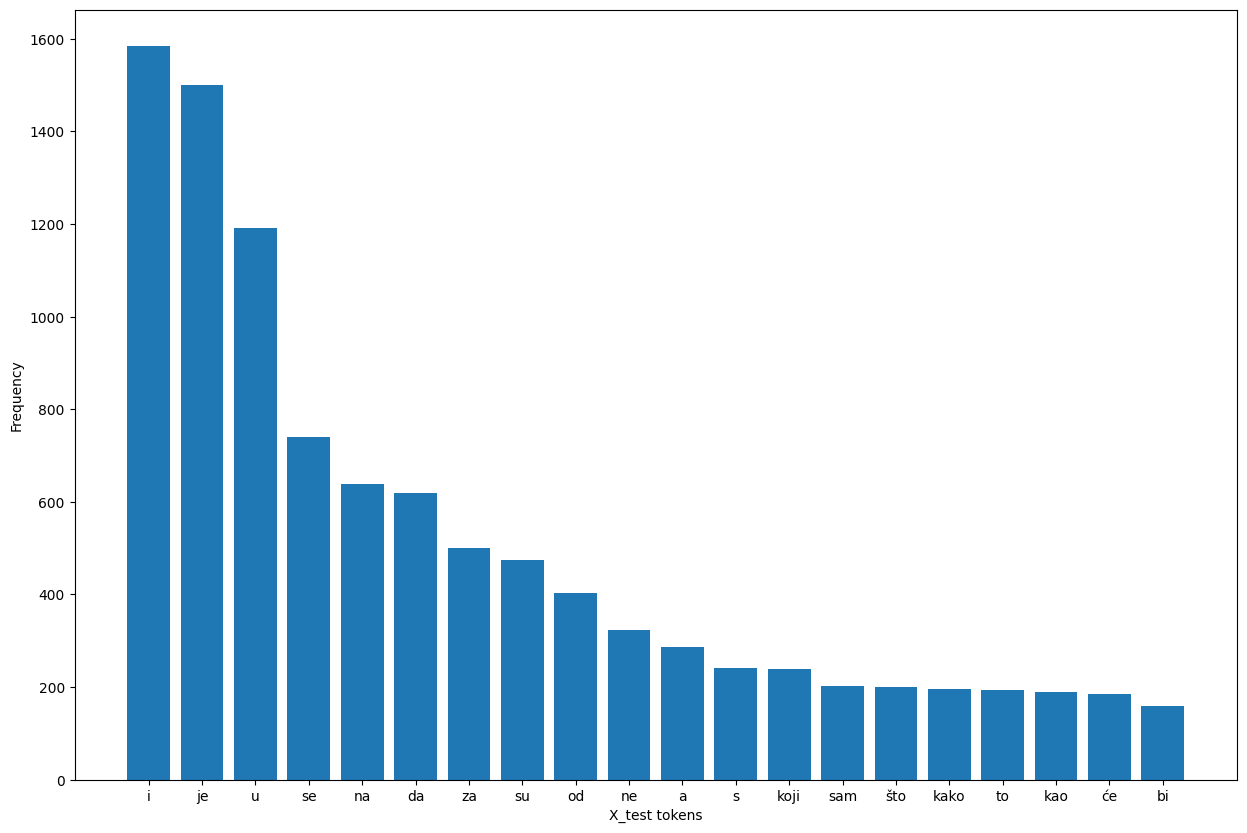

In [30]:
# create a bar plot to visualize the frequency of the top 20 most common words in the test dataset
xs=[x for x, y in word_freq3.most_common(20)]
ys=[y for x, y in word_freq3.most_common(20)]

plt.subplots(figsize=(15,10))
plt.bar(x=xs[:20], height=ys[:20])
plt.xlabel("X_test tokens")
plt.ylabel("Frequency")
plt.show()

In [31]:
# create a scatter plot with the word frequencies on the y-axis and the corresponding words on the x-axis
xs=[x for x, y in word_freq3.most_common()]
ys=[y for x, y in word_freq3.most_common()]

fig = px.scatter(x=xs, y=ys, labels={"x":"X_test token", "y": "Frequency"})
fig.show()

In [32]:
# how many words appeer x times in X_test
freqs3 = list(word_freq3.values())
print("How many words appear 1 time in X_test? ", freqs3.count(1))
print("How many words appear 10 times in X_test? ", freqs3.count(10))
print("How many words appear 20 times in X_test? ", freqs3.count(20))
print("How many words appear 30 times in X_test? ", freqs3.count(30))

How many words appear 1 time in X_test?  10332
How many words appear 10 times in X_test?  52
How many words appear 20 times in X_test?  12
How many words appear 30 times in X_test?  5


In [33]:
# visualize the distribution of word frequencies
# the x-axis represents word frequencies and the y-axis represents the number of words with a given frequency
count_freq3 = Counter(freqs3)

freq = [f for f, ff in count_freq3.most_common()]
freq_freq = [ff for f, ff in count_freq3.most_common()]

fig = px.scatter(x=freq, y=freq_freq, labels={"x": "Frequency", "y": "Number of words with a given frequency"})
fig.show()

In [34]:
# create a DataFrame containing information about the top 30 most common words in your dataset
data3 = []
for i, w in enumerate(word_freq3.most_common(30)):
  if i==0:
    t = w[1]
  data3.append([w[0], w[1], f"1/{i+1}", eval(f"1/{i+1}")*t, abs(w[1]-eval(f"1/{i+1}")*t)])

#  DataFrame with the columns "word", "word_freq" (frequency of the word in the dataset),
# "Zipf_fraction" (the fraction according to Zipf's law),
# "Zipf_freq" (expected frequency based on Zipf's law),
# and "Difference" (absolute difference between observed frequency and expected frequency based on Zipf's law).
df3 = pd.DataFrame(data=data3, columns=["word", "word_freq", "Zipf_fraction", "Zipf_freq", "Difference"])
df3

,word,word_freq,Zipf_fraction,Zipf_freq,Difference
0,i,1584,1/1,1584.000000,0.000000
1,je,1500,1/2,792.000000,708.000000
2,u,1191,1/3,528.000000,663.000000
3,se,740,1/4,396.000000,344.000000
4,na,639,1/5,316.800000,322.200000
5,da,618,1/6,264.000000,354.000000
6,za,501,1/7,226.285714,274.714286
7,su,474,1/8,198.000000,276.000000
8,od,402,1/9,176.000000,226.000000
9,ne,324,1/10,158.400000,165.600000


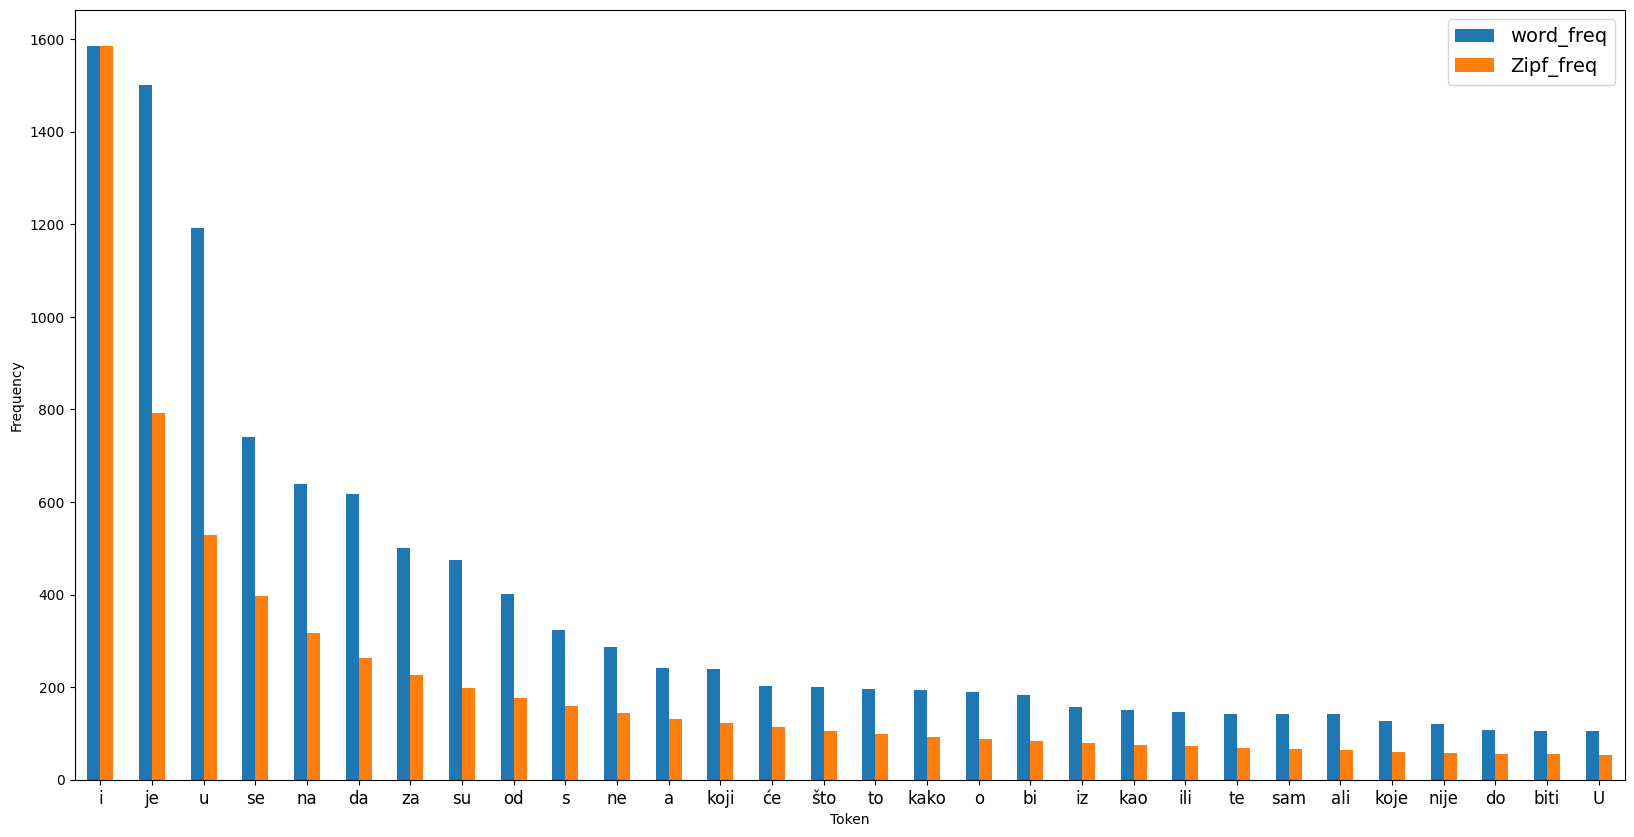

In [35]:
# create a bar plot comparing the observed word frequency with the Zipf frequency for the top 30 most common words
fig, ax = plt.subplots(figsize=(20,10))
df3.filter(['word',	'word_freq', 'Zipf_freq']).plot(kind='bar', ax=ax)
ax.set_xticklabels(df['word'], size=12, rotation=0)
ax.set_xlabel("Token")
ax.set_ylabel("Frequency")
ax.legend(fontsize=14);